
**Doughnut Of Social And Planetary Boundaries - Results**

<br>

Social Foundation Table


In [11]:
import csv
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import plotly.graph_objects as go


# --- Indicies --- #
skip_indicators = ["inadequateHous", "racialInequality", "EUshare_hzdHealth"]

eco_file_index = {
    "Air pollution": "data/eco-8_airPollution_clean.csv",
    "Biodiversity breakdown": "data/eco-7_biodiversityBreakdown_clean.csv",
    "Chemical pollution": "data/eco-3_chemPollution_clean.csv",
    "Climate change": "data/eco-1_climateChange_clean.csv",
    "Freshwater disruption": "data/eco-5_freshwaterDisruption_clean.csv",
    "Land conversion": "data/eco-6_landConversion_clean.csv",
    "Nutrient pollution": "data/eco-4_nutrientPollution_clean.csv",
    "Ocean acidification": "data/eco-2_oceanAcid_clean.csv",
    "Ozone depletion": "data/eco-9_ozoneDepletion_clean.csv"
}

soc_file_index = {
    "Connectivity": "data/soc-7_connectivity_clean.csv",
    "Education": "data/soc-3_education_clean.csv",
    "Energy": "data/soc-6_energy_clean.csv",
    "Equality": "data/soc-9_equality_clean.csv",
    "Food": "data/soc-1_food_clean.csv",
    "Health": "data/soc-2_health_clean.csv",
    "Housing": "data/soc-8_housing_clean.csv",
    "Income and work": "data/soc-4_incomeWork_clean.csv",
    "Peace and justice": "data/soc-12_peaceJustice_clean.csv",
    "Political voice": "data/soc-11_politicalVoice_clean.csv",
    "Social cohesion": "data/soc-10_socialCohesion_clean.csv",
    "Water": "data/soc-5_water_clean.csv"
}

soc_date_index = {
    "internet": (2000, 2022),
    "publicTrans": (2020, 2020),
    "adultLiteracy": (2000, 2022),
    "secondarySchool": (2000, 2022),
    "energyAccess": (2000, 2022),
    "energyIndoor": (2000, 2022),
    "genderGapIndex": (2000, 2022),
    "foodInsecurity": (2015, 2022),
    "undernourishment": (2000, 2022),
    "UHCindex": (2000, 2022),
    "under5death": (2000, 2022),
    "urbanSlums": (2000, 2022),
    "societalPoverty": (2000, 2022),
    "youthNEET": (2005, 2022),
    "controlCorruption": (2005, 2022),
    "homicideOver5": (2000, 2022),
    "govRegimes": (2000, 2022),
    "palma": (2000, 2022),
    "socialSupport": (2005, 2022),
    "drinkingH2O": (2000, 2022),
    "sanitation": (2000, 2022)
}

eco_date_index = {
    "interhemAOD": (2000, 2022),
    "extinction1900": (2000, 2022),
    "hanppGtC": (2000, 2020),
    "chemicalsMt": (2000, 2017),
    "EUshare_hzdHealth": (2000, 2022),
    "co2_ppm": (2000, 2022),
    "erf_wm2": (2000, 2022),
    "blueDev": (2000, 2005),
    "soilDev": (2000, 2014),
    "forestAreaMKM2": (2000, 2020),
    "nitrogenMt": (2000, 2022),
    "phosphorusMt": (2000, 2022),
    "omega_a": (2000, 2022),
    "totalOzone": (2000, 2021)
}

eco_thresholds = {
    "interhemAOD": (0.1, ">"),  # at most 0.1
    "extinction1900": (10, ">"),  # at most 10 E/MSY
    "hanppGtC": (5.59, ">"),  # at most 10% of 55.9 = 5.59 Gt C
    "chemicalsMt": (60, ">"),  # at most 5% of 1,200 Mt = 60 Mt
    "co2_ppm": (350, ">"),  # at most 350 ppm
    "erf_wm2": (1, ">"),  # at most 1 W m^-2
    "blueDev": (10.2, ">"),  # at most 10.2%
    "soilDev": (11.1, ">"),  # at most 11.1%
    "forestAreaMKM2": (48, "<"),  # at least 75% of 64 = 48 million km², overshoot when < 48
    "nitrogenMt": (62, ">"),  # at most 62 Mt
    "phosphorusMt": (6.2, ">"),  # at most 6.2 Mt
    "omega_a": (2.752, "<"),  # at least 80% of 3.44 = 2.752 Ωarag, overshoot when < 2.752
    "totalOzone": (275.5, "<"),  # at most 5% decrease: 290 - (290*0.05) = 275.5 DU, overshoot when < 275.5
}

eco_sandwich_index = {
     "interhemAOD": "Aerosol optical depth",
    "extinction1900": "Species extinction",
    "hanppGtC": "Human appropriation of energy production",
    "chemicalsMt": "Hazardous chemicals production",
    "co2_ppm":"CO2 concentration",
    "erf_wm2": "Radioactive forcing",
    "blueDev": "Blue-water flows",
    "soilDev": "Soil moisture",
    "forestAreaMKM2": "Forest area",
    "nitrogenMt": "Nitrogen pollution",
    "phosphorusMt":"Phosphorus pollution",
    "omega_a": "Aragonite saturation",
    "totalOzone": "Stratospheric ozone concentration"
}

eco_footprint_index = {
    "hanpp_footprint": "HANPP footprint",
    "blueH2O_footprint": "Blue water footrpint",
    "N_footprint": "Nitrogen footprint",
    "species_footprint": "Species-loss footrpint",
    "co2_footprint": "Carbon footprint",
    "P_footprint": "Phosphorus footprint"
}

soc_footprint_index = {
"internet": "Lack of internet",
"publicTrans": "Lack of public transport",
"adultLiteracy":"Illiteracy Rate",
"secondarySchool": "Incomplete Secondary School",
"energyAccess":"Lack of electricity",
"energyIndoor":"Lack of clean fuels indoors",
"genderGapIndex":"Gender Inequality",
"foodInsecurity":"Food insecurity",
"undernourishment":"Undernourished",
"UHCindex":"Lack of health services",
"under5death":"Under-5 mortality",
"urbanSlums":"Slums or informal housing",
"societalPoverty":"Societal poverty",
"youthNEET":"Youth NEET",
"controlCorruption":"Perceptions of corruption",
"homicideOver5": "Homicide Rate",
"govRegimes":"Autocratic regimes",
"palma":"Income inequality",
"socialSupport":"Lack of social support",
"drinkingH2O":"Unsafe drinking water",
"sanitation":"Unsafe sanitation"
}

soc_indicator_index = {
    "publicTrans": "Urban population lacking convenient access to public transport",
    "internet": "Population not accessing the internet",
    "secondarySchool": "Young adult population (aged 21-23 years) with incomplete upper secondary education",
    "adultLiteracy": "Adult population (aged 15+ years) who are illiterate",
    "energyIndoor": "Population lacking access to clean fuels and technologies for cooking, heating and lighting",
    "energyAccess": "Population lacking access to electricity",
    "genderGapIndex": "Population-weighted score on the Gender Inequality Index (global gap between women and men in terms of reproductive health, empowerment and employment)",
    "undernourishment": "Population undernourished",
    "foodInsecurity": "Population with moderate to severe food insecurity",
    "under5death": "Population living in countries with under-5 mortality rate exceeding 25 per 1,000 live births",
    "UHCindex": "Population living in countries without high coverage of essential health services (Universal Health Coverage Index score less than 60 out of 100)",
    "urbanSlums": "Urban population living in slums or informal settlements",
    "youthNEET": "Population of young people (aged 15-24 years) not in employment, education or training",
    "societalPoverty": "Population living below the societal poverty line, set at half their country's median household income or at least $15 a day",
    "controlCorruption": "Population stating that they perceive widespread corruption in government and business",
    "homicideOver5": "Population living in countries with a homicide rate of 5 or more per 100,000",
    "govRegimes": "Population living in countries governed by an autocratic regime",
    "palma": "Population living in countries with a Palma ratio of 2 or more (the income share of the richest 10% of people relative to the poorest 40%)",
    "socialSupport": "Population stating that they are without someone to count on in times of trouble",
    "drinkingH2O": "Population lacking access to safely managed drinking water",
    "sanitation": "Population lacking access to safely managed sanitation"
}

eco_indicator_index = {
    "interhemAOD": "Arithmetic Error Asymmetry between Earth's hemispheres of sunlight reaching the surface, owing to differences in atmospheric particle concentration (at most 0.1 inter-hemispheric difference in Aerosol Optical Depth)",
    "extinction1900": "Rate of species extinctions per million species years (at most 10 E/MSY)",
    "hanppGtC": "Human appropriation of net primary productivity, billions of tonnes of carbon per year (at most 10% of 55.9 Gt C)",
    "chemicalsMt": "Production of hazardous chemicals, millions of tonnes per year (at most 5% of the 1,200 Mt of total chemicals produced in year 2000)",
    "EUshare_hzdHealth": "",
    "co2_ppm": "Atmospheric carbon dioxide concentration, parts per million (at most 350 ppm CO2)",
    "erf_wm2": "Human-induced radiative forcing at the top of the atmosphere, Watt per square metre (at most 1 W m**(-2))",
    "blueDev": "Proportion of land area with human-induced disturbance of blue-water flow deviating from Holocene variability (at most 10.2%)",
    "soilDev": "Proportion of land area with root-zone soil moisture deviating from Holocene variability (at most 11.1%)",
    "forestAreaMKM2": "Area of forested land as a proportion of forest-covered land before human alteration (at least 75% of 64 million square kilometres)",
    "nitrogenMt": "Nitrogen applied to land as fertilizer, millions of tonnes per year (at most 62 Mt per year)",
    "phosphorusMt": "Phosphorus applied to land as fertilizer, millions of tonnes per year (at most 6.2 Mt per year)",
    "omega_a": "Average saturation state of aragonite at the ocean surface (at least 80% of pre-industrial saturation state of 3.44 Ωarag)",
    "totalOzone": "Concentration of ozone in the stratosphere, Dobson units (at most 5% decrease with respect to 1964-1980 value of 290 DU)"
}

def round_value(val):
    try:
        return round(float(val), 2)
    except (ValueError, TypeError):
        return ""

def filter_lines(file_path, dimension_name, domain):
    filtered = []
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        
        if domain.lower() == "eco":
            for row in reader:
                if (
                    row.get("dimension", "").lower() == dimension_name.lower() and
                    row.get("type", "").lower() == "global doughnut" and
                    row.get("group", "").lower() == "world" and
                    row.get("populationTotal", "").upper() == "NA" and
                    row.get("GNIperCap", "").upper() == "NA"
                ):
                    if row.get("indicator") not in skip_indicators:
                        filtered.append(row)

        else:
            for row in reader:
                try:
                    population = float(row.get("populationTotal", ""))
                    value = float(row.get("value", ""))
                    gni = row.get("GNIperCap", "")
                except (ValueError, TypeError):
                    continue

                if (
                    row.get("dimension", "").lower() == dimension_name.lower() and
                    row.get("group", "").lower() == "world" and
                    gni.upper() != "NA"
                ):
                    filtered.append(row)
    return filtered

def gatherData(domain):
    result_table = []
    file_index = eco_file_index if domain.lower() == "eco" else soc_file_index
    for dimension, file_path in file_index.items():
        filtered_rows = filter_lines(file_path, dimension, domain)

        indicators = defaultdict(list)
        for row in filtered_rows:
            indicators[row["indicator"]].append(row)

        for indicator, rows in indicators.items():
            date_to_value = {str(r["date"]): r["value"] for r in rows}

            if domain.lower() == "eco":
                start_date, end_date = eco_date_index[indicator]
            else:
                start_date, end_date = soc_date_index[indicator]

            start_value = round_value(date_to_value.get(str(start_date), ""))
            end_value = round_value(date_to_value.get(str(end_date), ""))

            
            if domain == "soc":
                if dimension == "Connectivity" or dimension == "Water" or dimension == "Energy" or dimension == "Education":
                    start_value = 100 - start_value
                    end_value = 100 - end_value
                
                if dimension == "Equality":
                    if 0 < start_value < 1:
                        start_value = start_value * 100
                    if 0 < end_value < 1:
                        end_value = end_value * 100

            result_table.append([
                dimension,
                eco_indicator_index[indicator] if domain.lower() == "eco" else soc_indicator_index[indicator],
                str(start_date),
                str(end_date),
                start_value,
                end_value
            ])
    return result_table

    
def buildTable(domain):
    headers = ["Dimension", "Indicator", "First Date", "Last Date", "First Value", "Last Value"]
    df = pd.DataFrame(gatherData(domain), columns=headers)    
    # --- Stylish display using Pandas Styler ---
    styled_df = df.style.hide(axis="index") \
        .set_table_styles([{"selector": "th", "props": [("background-color", "#4F81BD"),
                                                        ("color", "white"),
                                                        ("font-weight", "bold")]}]) \
        .format({"value_first": "{:.2f}", "value_last": "{:.2f}"}) \
        .set_properties(**{"text-align": "center"})
    
    display(styled_df)
    
buildTable("soc")
display(HTML("<br><br><span style='font-size:18px;'>Ecological Ceiling Table</span><br><br>"))
buildTable("eco")                                        

Dimension,Indicator,First Date,Last Date,First Value,Last Value
Connectivity,Population not accessing the internet,2000,2022,93.520000,35.820000
Connectivity,Urban population lacking convenient access to public transport,2020,2020,52.710000,52.710000
Education,Adult population (aged 15+ years) who are illiterate,2000,2022,23.130000,16.150000
Education,Young adult population (aged 21-23 years) with incomplete upper secondary education,2000,2022,60.870000,36.910000
Energy,Population lacking access to electricity,2000,2022,21.710000,8.510000
Energy,"Population lacking access to clean fuels and technologies for cooking, heating and lighting",2000,2022,50.490000,25.920000
Equality,"Population-weighted score on the Gender Inequality Index (global gap between women and men in terms of reproductive health, empowerment and employment)",2000,2022,46.000000,35.000000
Food,Population undernourished,2000,2022,13.090000,9.620000
Food,Population with moderate to severe food insecurity,2015,2022,22.240000,29.360000
Health,"Population living in countries with under-5 mortality rate exceeding 25 per 1,000 live births",2000,2022,75.400000,42.620000


Dimension,Indicator,First Date,Last Date,First Value,Last Value
Air pollution,"Arithmetic Error Asymmetry between Earth's hemispheres of sunlight reaching the surface, owing to differences in atmospheric particle concentration (at most 0.1 inter-hemispheric difference in Aerosol Optical Depth)",2000,2022,0.080000,0.080000
Biodiversity breakdown,Rate of species extinctions per million species years (at most 10 E/MSY),2000,2022,100.000000,100.000000
Biodiversity breakdown,"Human appropriation of net primary productivity, billions of tonnes of carbon per year (at most 10% of 55.9 Gt C)",2000,2020,14.600000,16.800000
Chemical pollution,"Production of hazardous chemicals, millions of tonnes per year (at most 5% of the 1,200 Mt of total chemicals produced in year 2000)",2000,2017,1186.000000,2276.000000
Climate change,"Atmospheric carbon dioxide concentration, parts per million (at most 350 ppm CO2)",2000,2022,368.960000,417.070000
Climate change,"Human-induced radiative forcing at the top of the atmosphere, Watt per square metre (at most 1 W m**(-2))",2000,2022,1.770000,2.910000
Freshwater disruption,Proportion of land area with human-induced disturbance of blue-water flow deviating from Holocene variability (at most 10.2%),2000,2005,0.180000,0.190000
Freshwater disruption,Proportion of land area with root-zone soil moisture deviating from Holocene variability (at most 11.1%),2000,2014,15.430000,19.250000
Land conversion,Area of forested land as a proportion of forest-covered land before human alteration (at least 75% of 64 million square kilometres),2000,2020,39.210000,38.270000
Nutrient pollution,"Nitrogen applied to land as fertilizer, millions of tonnes per year (at most 62 Mt per year)",2000,2022,132.240000,194.340000


**Country Clusters - Trellis Plots**
<br>

Ecological Overshoot Trellis Plots
<br>

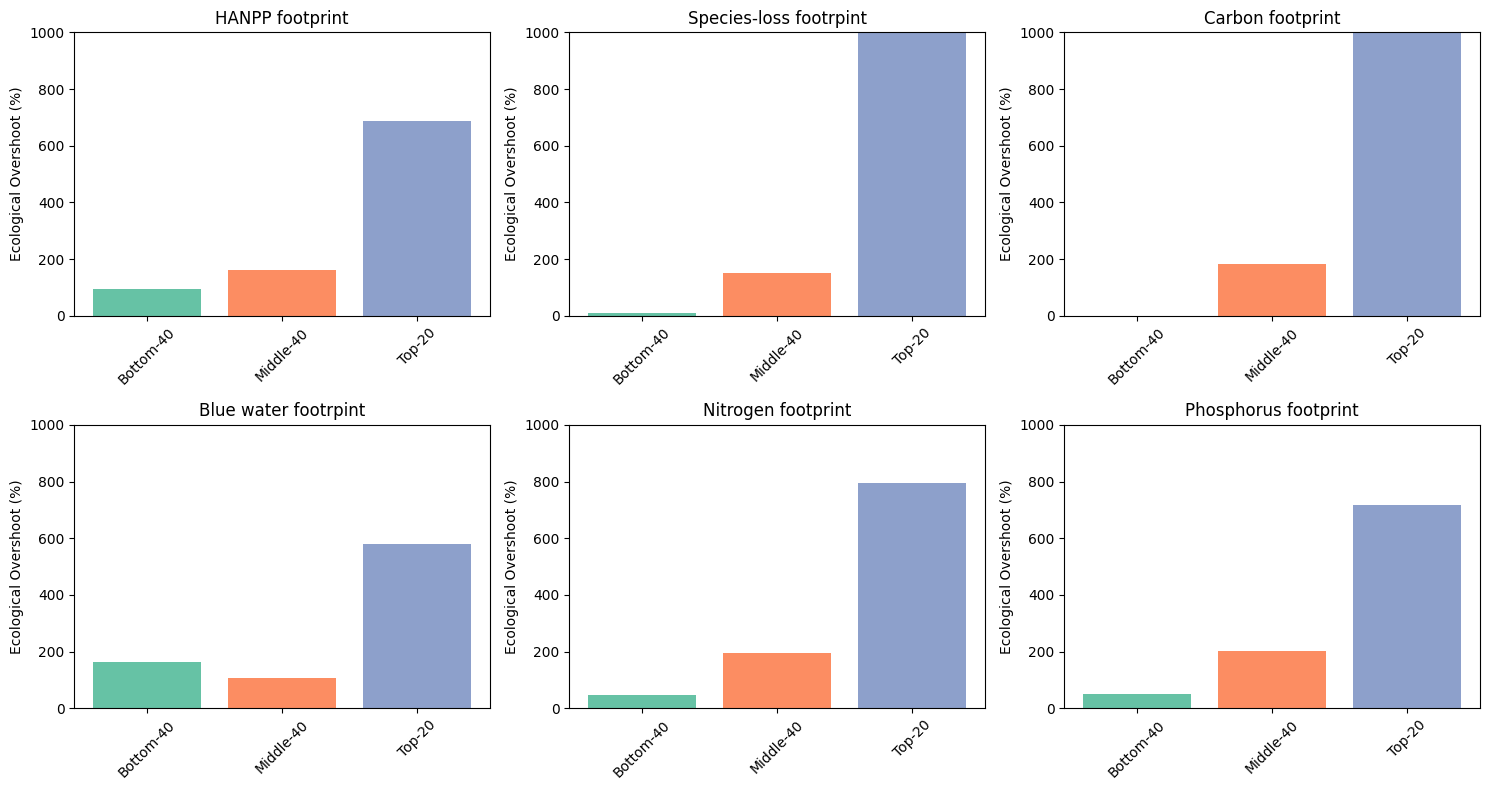

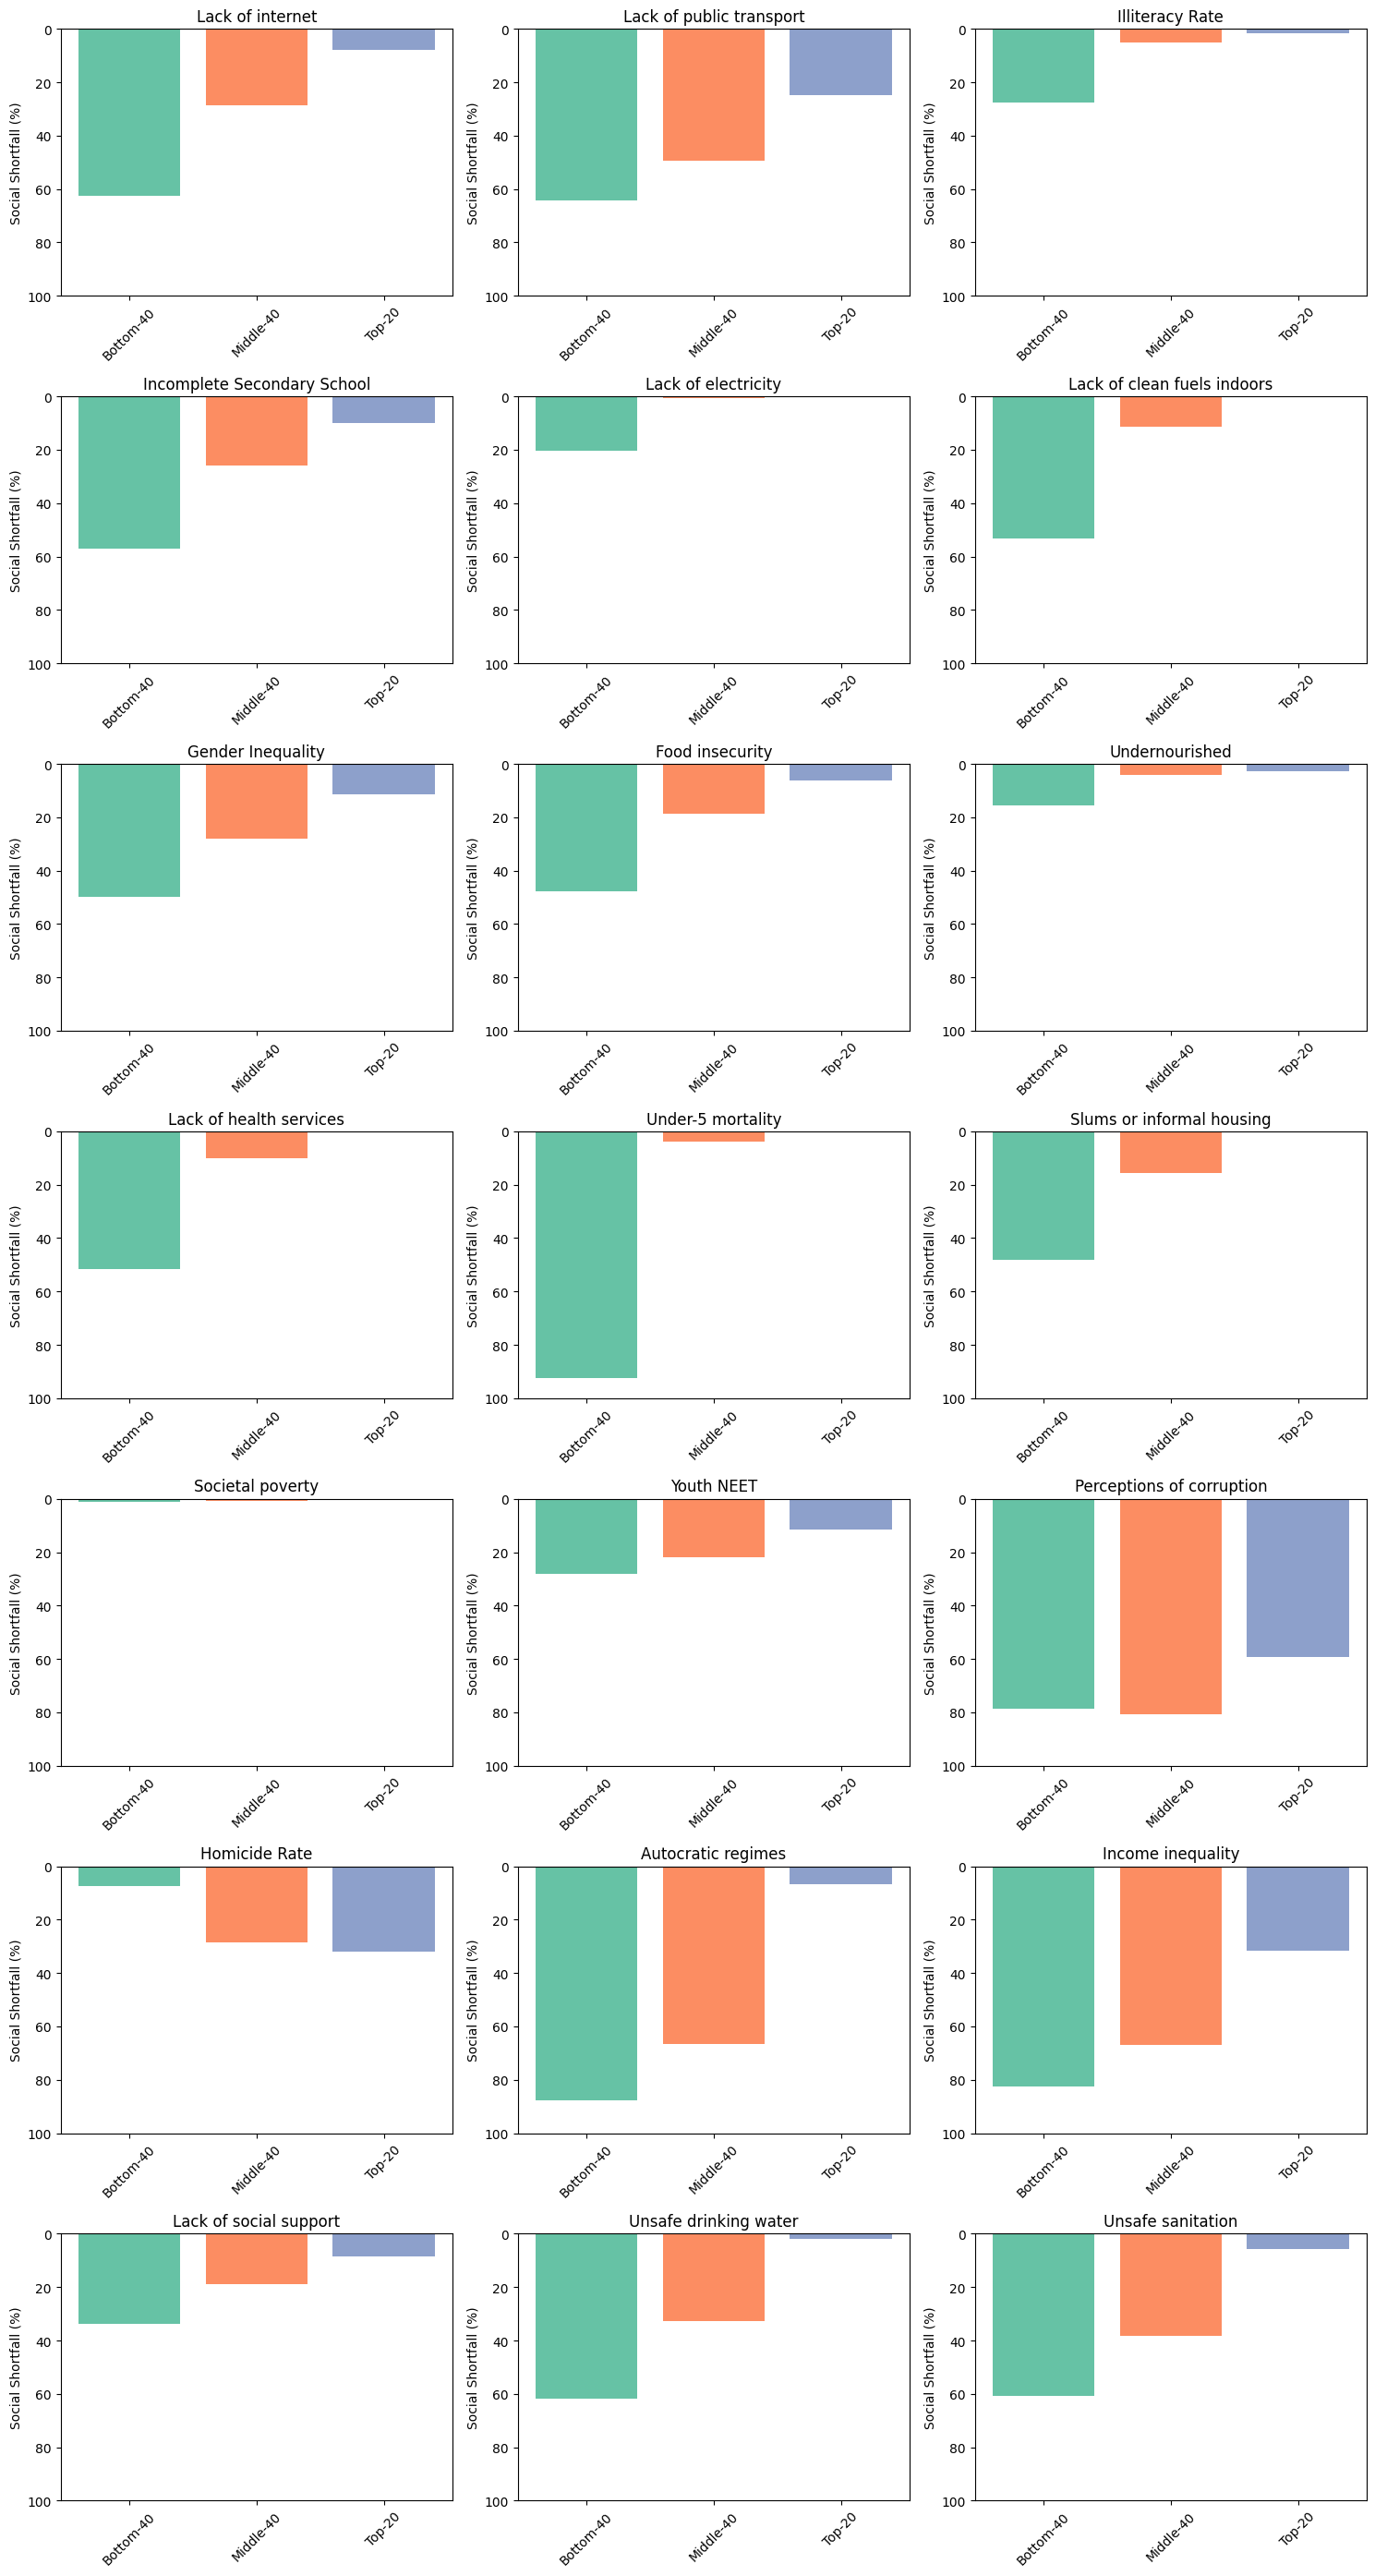

In [12]:
def get_shared_years(files_to_process):
    indicator_years = defaultdict(list)

    for file_path in files_to_process:
        df = pd.read_csv(file_path)
        df['value'] = pd.to_numeric(df['value'], errors='coerce')

        for indicator, sub in df.groupby('indicator'):
            if indicator in skip_indicators:
                continue

            pivot = sub.pivot(index='date', columns='group', values='value')
            required_groups = ['World', 'Bottom-40', 'Middle-40', 'Top-20']
            pivot_valid = pivot.dropna(subset=required_groups)
            valid_years = pivot_valid.index.tolist()
            indicator_years[indicator] = valid_years

    all_indicators = list(indicator_years.keys())
    if all_indicators:
        shared_years = set(indicator_years[all_indicators[0]])
        for ind in all_indicators[1:]:
            shared_years &= set(indicator_years[ind])
    else:
        shared_years = set()

    return sorted(shared_years)

def return_plot_data(file_list, domain):

    results = defaultdict(dict)

    for file_path in file_list:
        df = pd.read_csv(file_path)

        if domain == "eco":
            # Keep only national aggregate rows with non-null values
            df = df[(df["type"] == "national aggregate") & (df["value"].notna())]
        else:
            # Process trellis data only for a year where all the indicators share data for all groups
            shared_years = get_shared_years(list(soc_file_index.values()))
            if not shared_years:
                continue
            df = df[df["date"] == shared_years[0]]

        df["value"] = pd.to_numeric(df["value"], errors="coerce")
        df = df[df["value"].notna()]

        # Group by indicator
        for indicator, sub in df.groupby("indicator"):
            dimension = sub.iloc[0]["dimension"].lower()
            if indicator in skip_indicators:
                continue  # skips this indicator entirely

            rows = {row["group"]: row["value"] for _, row in sub.iterrows()}
            required = {"World", "Bottom-40", "Middle-40", "Top-20"}
            if not required.issubset(rows.keys()):
                continue

            world_value = rows["World"]
            allocations = {
                "Bottom-40": 0.40 * world_value,
                "Middle-40": 0.40 * world_value,
                "Top-20": 0.20 * world_value
            }

            result_for_indicator = {}
            for group in ["Bottom-40", "Middle-40", "Top-20"]:
                if domain == "eco":
                    result_for_indicator[group] = (rows[group] - allocations[group]) / allocations[group] * 100
                else:
                    groupValue = rows[group]
                    if dimension == "energy" or dimension == "connectivity" or dimension == "water" or dimension == "education":
                        groupValue = 100 - rows[group]
                    if dimension == "equality":
                        groupValue = rows[group] * 100
                    result_for_indicator[group] = groupValue

            results[indicator].update(result_for_indicator)
           
            
    return results

def buildTrellis(domain):
    if domain == "eco":
        files_to_process = list(eco_file_index.values())
    else:
        files_to_process = list(soc_file_index.values())

    results = return_plot_data(files_to_process, domain)

    # Early exit if no results
    if not results:
        return

    data = []
    if domain == "eco":
        for indicator, groups in results.items():
            for group, overshoot in groups.items():
                data.append({"Indicator": indicator, "Group": group, "Ecological Overshoot (%)": overshoot})
    else:
        for indicator, groups in results.items():
            for group, shorfall in groups.items():
                data.append({"Indicator": indicator, "Group": group, "Social Shorfall (%)": shorfall})
    df_plot = pd.DataFrame(data)

    # -------------------------
    # Step 5: Matplotlib trellis plot
    # -------------------------
    indicators = df_plot['Indicator'].unique()
    n_cols = 3
    n_rows = (len(indicators) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()

    if domain == "eco":
        for i, indicator in enumerate(indicators):
            ax = axes[i]
            subset = df_plot[df_plot["Indicator"] == indicator]
            ax.bar(subset["Group"], subset["Ecological Overshoot (%)"], color=["#66c2a5", "#fc8d62", "#8da0cb"])

            title = eco_footprint_index.get(indicator, indicator)
            ax.set_title(title)
            ax.set_ylabel("Ecological Overshoot (%)")
            ax.set_ylim(0, 1000)
            ax.tick_params(axis='x', rotation=45)
    else:
        for i, indicator in enumerate(indicators):
            ax = axes[i]
            subset = df_plot[df_plot["Indicator"] == indicator]

            # Plot values normally (NO negation)
            ax.bar(
                subset["Group"],
                subset["Social Shorfall (%)"],  
                color=["#66c2a5", "#fc8d62", "#8da0cb"]
            )

            title = soc_footprint_index.get(indicator, indicator)
            ax.set_title(title)
            ax.set_ylabel("Social Shortfall (%)")

            # Invert the y-axis so 0 is at top, 100 at bottom
            ax.set_ylim(0, 100)
            ax.invert_yaxis()  # This inverts the axis

            ax.tick_params(axis='x', rotation=45)
    

    plt.tight_layout()
    plt.show()

buildTrellis("eco")
display(HTML("<br><br><span style='font-size:18px;'>Social Shortfall Trellis Plots</span><br><br>"))
buildTrellis("soc")



**Sandwich Plot - Ecological Overshoot over Social Shortfall**
<br>

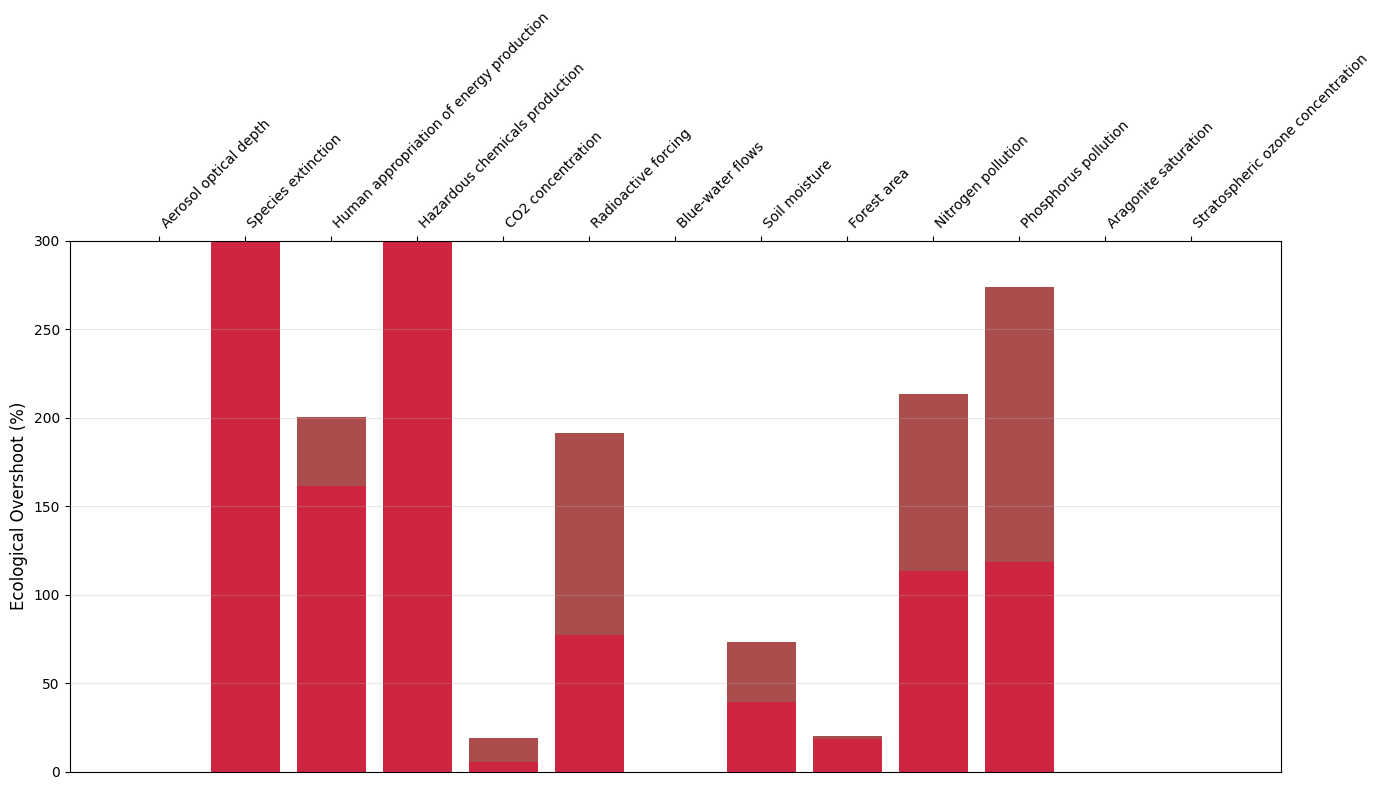

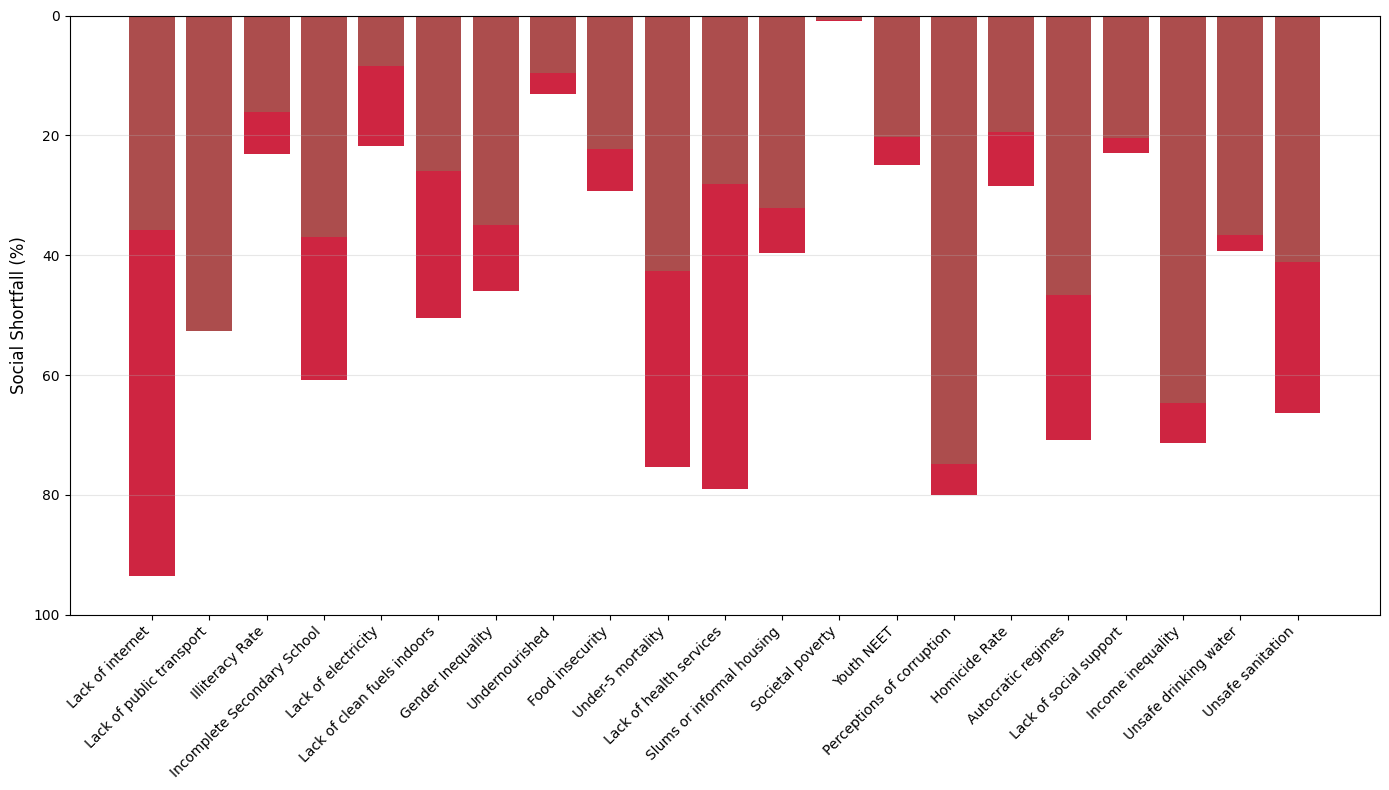

In [13]:
def returnStartEndOvershootShortfall(domain):
    if domain == "eco":
        initial_data = gatherData(domain)
        result_overshoot = {}

        for row in initial_data:
            description = row[1]
            start_value = row[4]
            end_value = row[5]
            
            # Find the indicator key - need to match description to get the key
            indicator = None
            for key, desc in eco_indicator_index.items():
                if desc == description:
                    indicator = key
                    break
            
            if indicator and indicator in eco_thresholds:
                threshold_value, operator = eco_thresholds[indicator]
                
                # Calculate overshoot percentage for start value
                if operator == ">":
                    # Overshoot when value > threshold
                    if start_value > threshold_value:
                        start_overshoot = ((start_value - threshold_value) / threshold_value) * 100
                    else:
                        start_overshoot = 0  # No overshoot
                    
                    if end_value > threshold_value:
                        end_overshoot = ((end_value - threshold_value) / threshold_value) * 100
                    else:
                        end_overshoot = 0
                
                else:  # operator == "<"
                    # Overshoot when value < threshold
                    if start_value < threshold_value:
                        start_overshoot = ((threshold_value - start_value) / threshold_value) * 100
                    else:
                        start_overshoot = 0
                    
                    if end_value < threshold_value:
                        end_overshoot = ((threshold_value - end_value) / threshold_value) * 100
                    else:
                        end_overshoot = 0
                
                result_overshoot[indicator] = (round_value(start_overshoot), round_value(end_overshoot))

        return result_overshoot
    else:
        initial_data = gatherData(domain)
        result_shortfall = {}
        for row in initial_data:
            description = row[1]
            start_shortfall = row[4]
            end_shortfall = row[5]
            indicator = None

            for key, desc in soc_indicator_index.items():
                if desc == description:
                    indicator = key
                    break
            
            result_shortfall[indicator] = (start_shortfall, end_shortfall)

        return result_shortfall
    
def buildSandwich(domain):
    # Create DataFrame from result_overshoot
    data = []
    if domain == "eco":
        
        for indicator, (start_overshoot, end_overshoot) in returnStartEndOvershootShortfall(domain).items():
            # Get the readable name from eco_indicator_index
            name = eco_sandwich_index[indicator]
            data.append({
                'indicator': name,
                'start_overshoot': start_overshoot,
                'end_overshoot': end_overshoot,
                'additional_overshoot': end_overshoot - start_overshoot
            })
    else:
        for indicator, (start_shortfall, end_shortfall) in returnStartEndOvershootShortfall(domain).items():
            # Get the readable name from soc_indicator_index
            name = soc_footprint_index[indicator]
            data.append({
                'indicator': name,
                'start_shortfall': start_shortfall,
                'end_shortfall': end_shortfall,
                'additional_shortfall': end_shortfall - start_shortfall
            })

    df = pd.DataFrame(data) 
 
    # Create the plot 
    fig, ax = plt.subplots(figsize=(14, 8)) 

    # Don't sort - keep original order 
    indicators = df['indicator'] 
    x_pos = range(len(indicators)) 
    ax.set_xticks(x_pos)
    
    ax.grid(axis='y', alpha=0.3) 

    # Plot light red (start overshoot) 
    if domain == "eco": 
        ax.set_xticklabels(indicators, rotation=45, ha='left') 
        ax.bar(x_pos, df['start_overshoot'], color='#ce2541', label='Start (2000)') 
        # Plot dark red (additional overshoot from start to end) 
        ax.bar(x_pos, df['additional_overshoot'], bottom=df['start_overshoot'],  
                color='#ac4d4d', label='Additional by End (2022)') 
        ax.set_ylabel('Ecological Overshoot (%)', fontsize=12) 
        ax.set_ylim(0, 300) 
        ax.xaxis.tick_top()  # Move x-axis labels to top for eco
    else: 
        ax.set_xticklabels(indicators, rotation=45, ha='right') 
        ax.bar(x_pos, df['start_shortfall'], color='#ac4d4d', label='Start (2000)') 
        # Plot dark red (additional overshoot from start to end) 
        ax.bar(x_pos, df['additional_shortfall'], bottom=df['start_shortfall'],  
                color='#ce2541', label='Additional by End (2022)') 
        ax.set_ylabel('Social Shortfall (%)', fontsize=12) 
        ax.set_ylim(100, 0) 
        # Labels stay at bottom (default) for soc

    plt.tight_layout() 
    plt.show()

buildSandwich("eco")
buildSandwich("soc")


**Doughnut Plot**
<br>

In [14]:
def buildDoughnut():
    # Get the data
    eco_data = returnStartEndOvershootShortfall("eco")
    soc_data = returnStartEndOvershootShortfall("soc")
    
    # Extract end values (percentages)
    eco_values = [end for start, end in eco_data.values()]
    eco_labels = [eco_sandwich_index[key] for key in eco_data.keys()]
    
    soc_values = [end for start, end in soc_data.values()]
    soc_labels = [soc_footprint_index[key] for key in soc_data.keys()]
    
    # Create figure
    fig = go.Figure()
    
    # Inner ring - Social shortfall (smaller radius)
    fig.add_trace(go.Pie(
        labels=[f'{label}<br>({val:.1f}%)' for label, val in zip(soc_labels, soc_values)],
        values=soc_values,
        name="Social Shortfall",
        hole=0.5,
        domain={'x': [0.2, 0.8], 'y': [0.2, 0.8]},
        marker=dict(colors=['#3b82f6', '#60a5fa', '#93c5fd', '#bfdbfe', '#dbeafe', 
                            '#2563eb', '#1d4ed8', '#1e40af', '#1e3a8a', '#172554',
                            '#0ea5e9', '#0284c7']),
        hovertemplate='<b>%{label}</b><extra></extra>',
        textposition='inside',
        textfont=dict(size=9)
    ))
    
    # Outer ring - Ecological overshoot (larger radius)
    fig.add_trace(go.Pie(
        labels=[f'{label}<br>({val:.1f}%)' for label, val in zip(eco_labels, eco_values)],
        values=eco_values,
        name="Ecological Overshoot",
        hole=0.7,
        domain={'x': [0, 1], 'y': [0, 1]},
        marker=dict(colors=['#ef4444', '#f87171', '#fca5a5', '#fecaca', '#fee2e2',
                            '#dc2626', '#b91c1c', '#991b1b', '#7f1d1d', '#450a0a',
                            '#f97316', '#ea580c', '#c2410c']),
        hovertemplate='<b>%{label}</b><extra></extra>',
        textposition='inside',
        textfont=dict(size=10),
    ))
    
    # Add center annotation
    fig.add_annotation(
        text="<b>Inner: Social Foundation<br>Outter: Ecological Ceiling</b>",
        x=0.5, y=0.5,
        font=dict(size=13, color='#2d5016'),
        showarrow=False
    )
    
    fig.update_layout(
        title=dict(
            text="<b>Social Shortfall and Ecological Overshoot</b>",
            x=0.5,
            xanchor='center',
            font=dict(size=18)
        ),
        showlegend=False,
        height=900,
        width=900
    )


    fig.show()

buildDoughnut()